In [2]:
import stata_setup
stata_setup.config("C:/Program Files/Stata18/", "mp")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user 2-core network, expiring 21 Apr 2026
Serial number: 501909301584
  Licensed to: Yu Zhang
               Peking University, GuangHua School of Management

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [3]:
import akshare as ak

In [4]:
stock_history_hfq = ak.stock_zh_a_hist(symbol='600519',period='daily',adjust='hfq')  # 后复权（历史价格不变）

In [5]:
%%stata
frame change default
cap frame drop stock
frame create stock
frame change stock


. frame change default

. cap frame drop stock

. frame create stock

. frame change stock

. 


In [5]:
%%stata -d stock_history_hfq
frame stock: describe


Contains data
 Observations:         5,558                  
    Variables:            12                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
日期            str10   %10s                  
股票代码        str9    %9s                   
开盘            double  %10.0g                
收盘            double  %10.0g                
最高            double  %10.0g                
最低            double  %10.0g                
成交量          long    %12.0g                
成交额          double  %10.0g                
振幅            double  %10.0g                
涨跌幅          double  %10.0g                
涨跌额          double  %10.0g                
换手率          double  %10.0g                
-------------------------------------------------------------------------------
Sorted by: 
    

In [6]:
%%stata
frame stock: codebook 日期


-------------------------------------------------------------------------------
日期                                                                (unlabeled)
-------------------------------------------------------------------------------

                  Type: String (str10)

         Unique values: 5,558                     Missing "": 0/5,558

              Examples: "2006-07-10"
                        "2011-02-18"
                        "2015-09-17"
                        "2020-04-14"


In [7]:
%stata help date


[FN] Date and time functions    
(View complete PDF manual entry)


Function
--------

    date(s1,s2[,Y])
       Description:     the e_d date (days since 01jan1960) corresponding to
                        s1 based on s2 and Y

                        s1 contains the date, recorded as a string, in
                        virtually any format.  Months can be spelled out,
                        abbreviated (to three characters), or indicated as
                        numbers; years can include or exclude the century;
                        blanks and punctuation are allowed.

                        s2 is any permutation of M, D, and [##]Y, with their
                        order defining the order that month, day, and year
                        occur in s1.  ##, if specified, indicates the default
                        century for two-digit years in s1.  For instance,
                        s2="MD19Y" would translate s1="11/15/91" as
                        15nov1991.

     

In [8]:
%%stata
frame stock: cap drop date
frame stock: gen date = date(日期,"YMD")
frame stock: format date %td
frame stock: codebook date


. frame stock: cap drop date

. frame stock: gen date = date(日期,"YMD")

. frame stock: format date %td

. frame stock: codebook date

-------------------------------------------------------------------------------
date                                                                (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric daily date (float)

                 Range: [15214,23694]                 Units: 1
       Or equivalently: [27aug2001,14nov2024]         Units: days
         Unique values: 5,558                     Missing .: 0/5,558

                  Mean: 19492.3 = 14may2013(+ 7 hours)
             Std. dev.: 2442.34
           Percentiles:       10%        25%        50%        75%        90%
                            16064      17414    19522.5      21605      22855
                        25dec2003  05sep2007  13jun2013  25feb2019  29jul2022

. 


In [9]:
%%stata
frame stock: drop if missing(收盘) // 只保留有收盘价的交易日
frame stock: sort date // 交易日从前到后排列
frame stock: cap drop ret_i
frame stock: gen ret_i = ln(收盘) - ln(收盘[_n-1]) // 当日收盘价相对上一交易日收盘价的对数回报


. frame stock: drop if missing(收盘) // 只保留有收盘价的交易日
(0 observations deleted)

. frame stock: sort date // 交易日从前到后排列

. frame stock: cap drop ret_i

. frame stock: gen ret_i = ln(收盘) - ln(收盘[_n-1]) // 当日收盘价相对上一交易
> 日收盘价的对数回报
(1 missing value generated)

. 


In [10]:
%%stata
frame stock: list in 1/5


     +----------------------------------------------------------------------+
  1. |       日期 | 股票代码  |  开盘  |  收盘  |  最高  |  最低  | 成交量  |
     | 2001-08-27 |   600519  | 34.51  | 35.55  | 37.78  | 32.85  | 406318  |
     |----------------------------------------------------------------------|
     |    成交额 |  振幅 | 涨跌幅 | 涨跌额 | 换手率 |      date |     ret_i |
     | 1.410e+09 | 15.71 |  13.25 |   4.16 |  56.83 | 27aug2001 |         . |
     +----------------------------------------------------------------------+

     +----------------------------------------------------------------------+
  2. |       日期 | 股票代码  |  开盘  |  收盘  |  最高  |  最低  | 成交量  |
     | 2001-08-28 |   600519  | 34.99  | 36.86  |    37  | 34.61  | 129647  |
     |----------------------------------------------------------------------|
     |    成交额 |  振幅 | 涨跌幅 | 涨跌额 | 换手率 |      date |     ret_i |
     | 4.635e+08 |  6.72 |   3.68 |   1.31 |  18.13 | 28aug2001 |  .0361868 |
     +----------------------------------------

In [11]:
%%stata
cap drop 名称
frame stock: gen 名称="贵州茅台"
frame stock: order 股票代码 名称
frame stock: list in 1/5


. cap drop 名称

. frame stock: gen 名称="贵州茅台"

. frame stock: order 股票代码 名称

. frame stock: list in 1/5

     +-------------------------------------------------------------------+
  1. | 股票代码 |     名称 |       日期 |  开盘 |  收盘 |  最高 |  最低  |
     |   600519 | 贵州茅台 | 2001-08-27 | 34.51 | 35.55 | 37.78 | 32.85  |
     |-------------------------------------------------------------------|
     | 成交量 |    成交额 |  振幅 | 涨跌幅 | 涨跌额 | 换手率 |      date |
     | 406318 | 1.410e+09 | 15.71 |  13.25 |   4.16 |  56.83 | 27aug2001 |
     |-------------------------------------------------------------------|
     |                                 ret_i                             |
     |                                     .                             |
     +-------------------------------------------------------------------+

     +-------------------------------------------------------------------+
  2. | 股票代码 |     名称 |       日期 |  开盘 |  收盘 |  最高 |  最低  |
     |   600519 | 贵州茅台 | 2001-08-28 | 34.99 | 36

In [34]:
%%stata
frame stock: keep 股票代码 名称 date ret_i
frame stock: list in 1/5


. frame stock: keep 股票代码 名称 date ret_i

. frame stock: list in 1/5

     +---------------------------------------------+
     | 股票代码       名称        date       ret_i |
     |---------------------------------------------|
  1. |   600519   贵州茅台   27aug2001           . |
  2. |   600519   贵州茅台   28aug2001    .0361868 |
  3. |   600519   贵州茅台   29aug2001   -.0131078 |
  4. |   600519   贵州茅台   30aug2001    .0195978 |
  5. |   600519   贵州茅台   31aug2001   -.0024288 |
     +---------------------------------------------+

. 


In [12]:
%%stata
frame stock: cap drop 单数日
frame stock: gen 单数日 = mod(day(date),2)==1
frame stock: list in 1/5


. frame stock: cap drop 单数日

. frame stock: gen 单数日 = mod(day(date),2)==1

. frame stock: list in 1/5

     +-------------------------------------------------------------------+
  1. | 股票代码 |     名称 |       日期 |  开盘 |  收盘 |  最高 |  最低  |
     |   600519 | 贵州茅台 | 2001-08-27 | 34.51 | 35.55 | 37.78 | 32.85  |
     |-------------------------------------------------------------------|
     | 成交量 |    成交额 |  振幅 | 涨跌幅 | 涨跌额 | 换手率 |      date |
     | 406318 | 1.410e+09 | 15.71 |  13.25 |   4.16 |  56.83 | 27aug2001 |
     |-------------------------------------------------------------------|
     |                ret_i             |             单数日             |
     |                    .             |                  1             |
     +-------------------------------------------------------------------+

     +-------------------------------------------------------------------+
  2. | 股票代码 |     名称 |       日期 |  开盘 |  收盘 |  最高 |  最低  |
     |   600519 | 贵州茅台 | 2001-08-28 | 34.99 | 36.86

In [13]:
%%stata
reg ret_i i.单数日


      Source |       SS           df       MS      Number of obs   =     5,557
-------------+----------------------------------   F(1, 5555)      =      0.77
       Model |  .000289699         1  .000289699   Prob > F        =    0.3813
    Residual |  2.09936171     5,555  .000377923   R-squared       =    0.0001
-------------+----------------------------------   Adj R-squared   =   -0.0000
       Total |  2.09965141     5,556  .000377907   Root MSE        =    .01944

------------------------------------------------------------------------------
       ret_i | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    1.单数日 |   .0004567   .0005216     0.88   0.381    -.0005659    .0014793
       _cons |   .0007653   .0003715     2.06   0.039     .0000371    .0014935
------------------------------------------------------------------------------


In [14]:
%%stata
ttest ret_i, by(单数日) unpaired unequal


Two-sample t test with unequal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf. interval]
---------+--------------------------------------------------------------------
       0 |   2,739    .0007653    .0003683    .0192739    .0000432    .0014875
       1 |   2,818     .001222    .0003692    .0196005     .000498     .001946
---------+--------------------------------------------------------------------
Combined |   5,557    .0009969    .0002608    .0194398    .0004857    .0015082
---------+--------------------------------------------------------------------
    diff |           -.0004567    .0005215                -.001479    .0005656
------------------------------------------------------------------------------
    diff = mean(0) - mean(1)                                      t =  -0.8757
H0: diff = 0                     Satterthwaite's degrees of freedom =  5554.25

    Ha: d

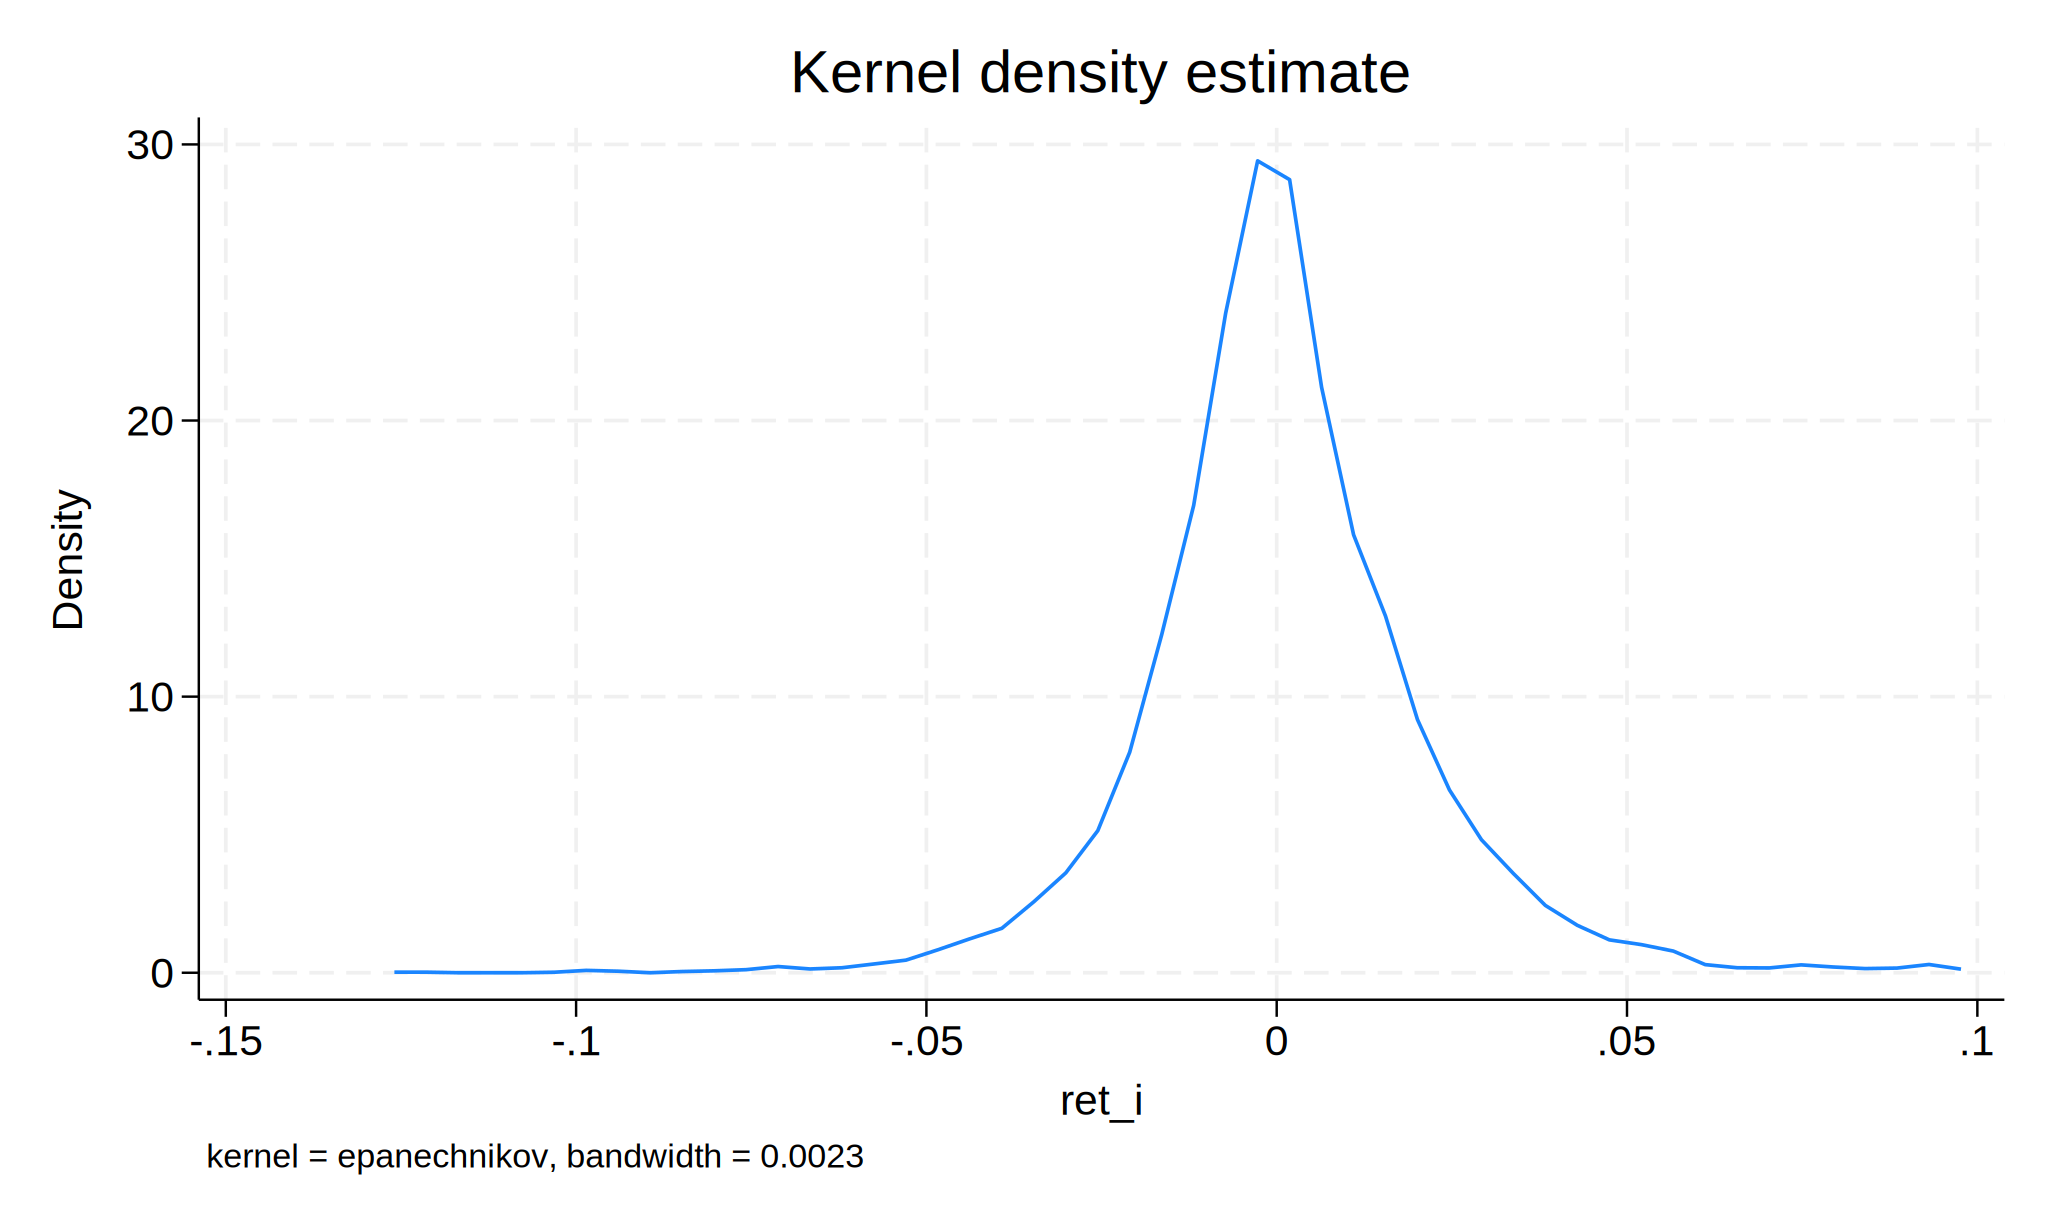

In [15]:
%%stata
kdensity ret_i

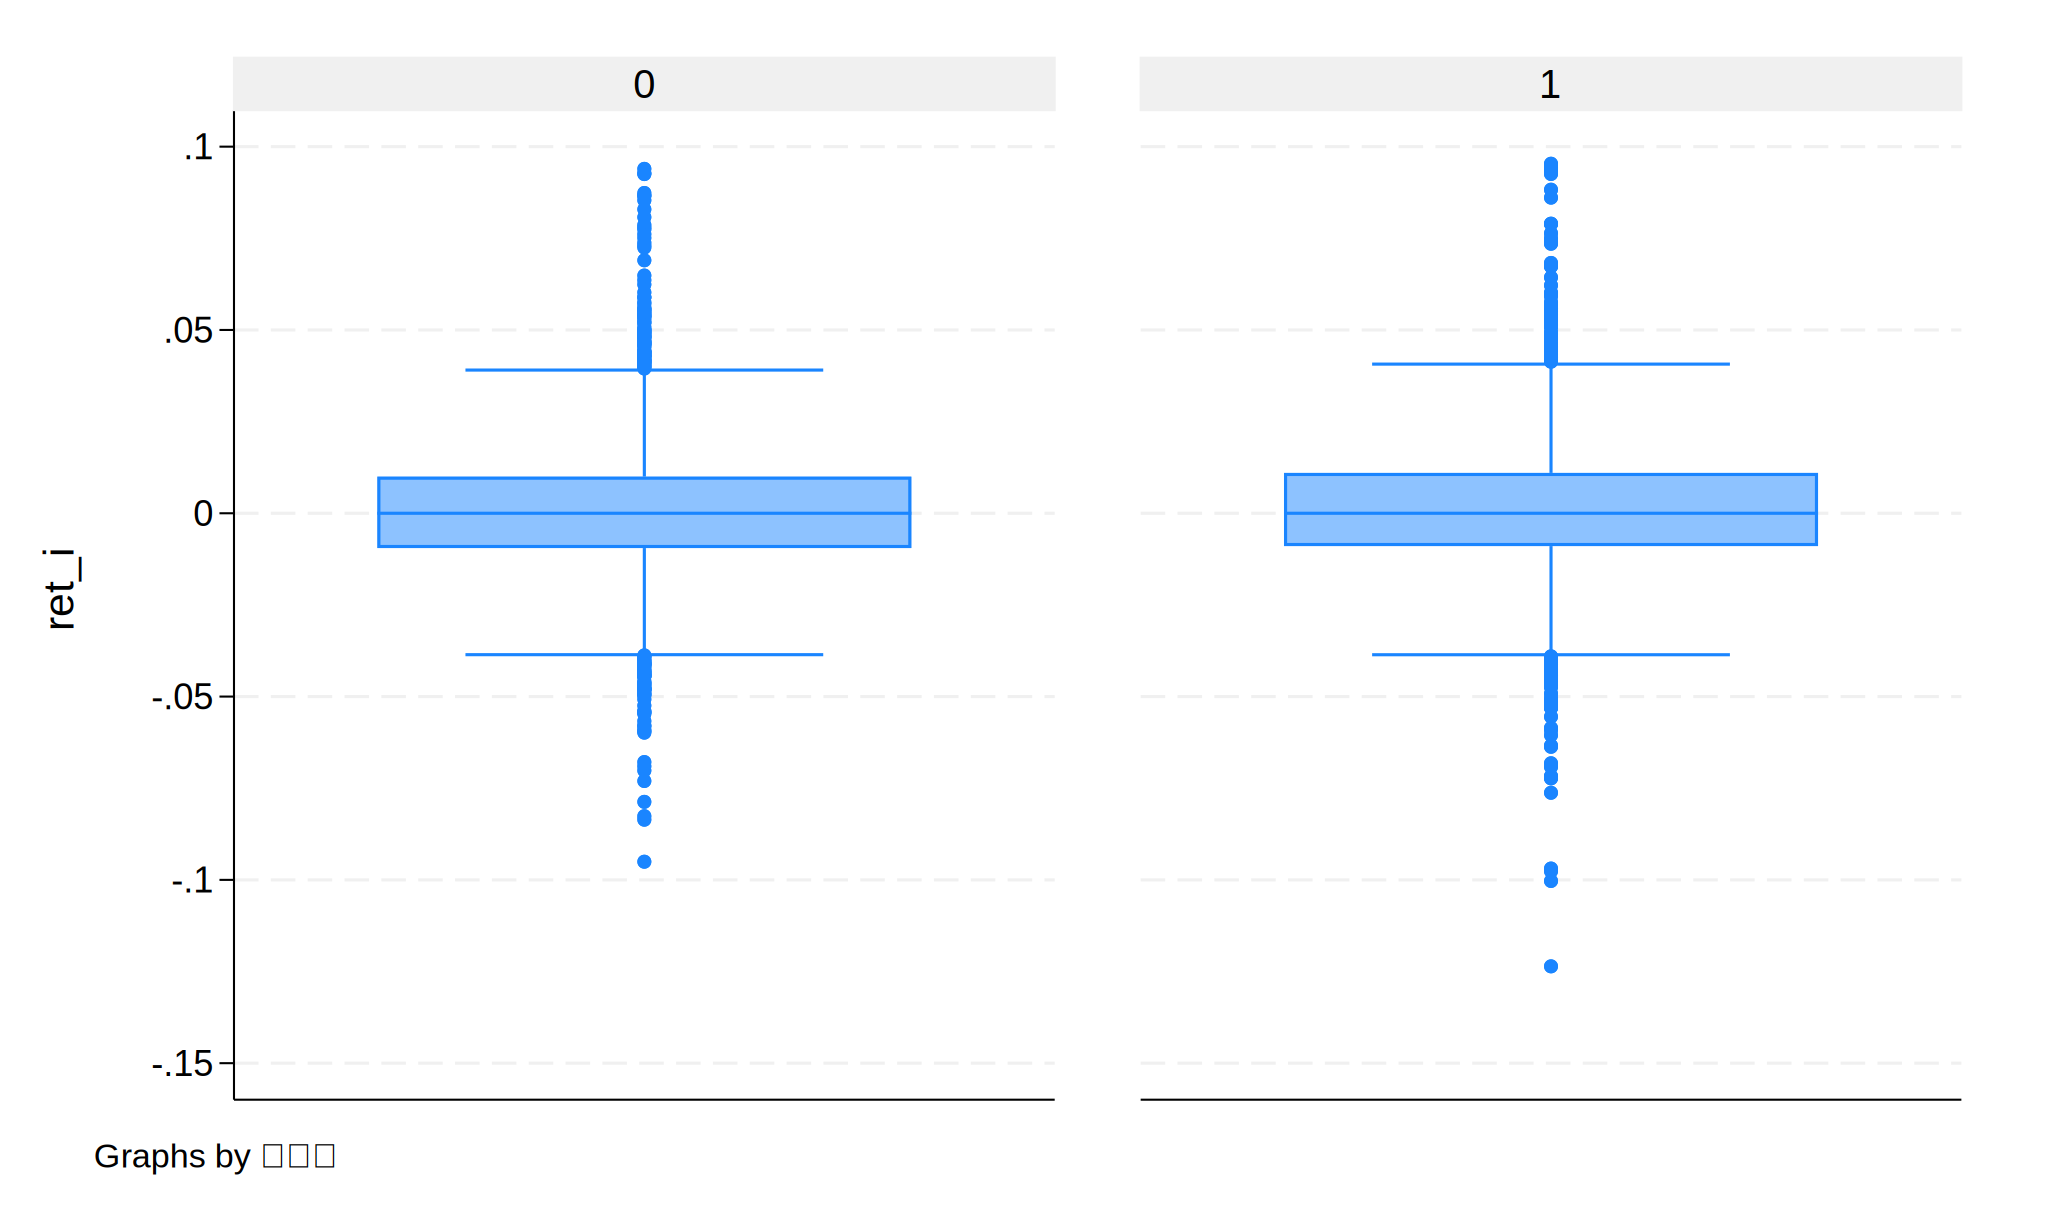

In [16]:
%%stata
graph box ret_i, by(单数日)

In [17]:
index_history = ak.stock_zh_index_daily(symbol = "sh000300")

In [18]:
%%stata
frame change default
cap frame drop index
frame create index
frame change index


. frame change default

. cap frame drop index

. frame create index

. frame change index

. 


In [19]:
%%stata -d index_history
frame index: describe


Contains data
 Observations:         5,545                  
    Variables:             6                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
date            str10   %10s                  
open            double  %10.0g                
high            double  %10.0g                
low             double  %10.0g                
close           double  %10.0g                
volume          double  %12.0g                
-------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [20]:
%%stata
frame index: ren date date1
frame index: gen date = date(date1,"YMD")
frame index: format date %td
frame index: codebook date


. frame index: ren date date1

. frame index: gen date = date(date1,"YMD")

. frame index: format date %td

. frame index: codebook date

-------------------------------------------------------------------------------
date                                                                (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric daily date (float)

                 Range: [15344,23693]                 Units: 1
       Or equivalently: [04jan2002,13nov2024]         Units: days
         Unique values: 5,545                     Missing .: 0/5,545

                  Mean:   19524 = 14jun2013(+ 23 hours)
             Std. dev.: 2405.59
           Percentiles:       10%        25%        50%        75%        90%
                            16190      17447      19530      21607      22855
                        29apr2004  08oct2007  21jun2013  27feb2019  29jul2022

. 


In [21]:
%%stata
frame index: drop if missing(close) // 只保留有收盘价的交易日
frame index: sort date // 交易日从前到后排列
frame index: cap drop ret_m
frame index: gen ret_m = ln(close) - ln(close[_n-1]) // 当日收盘价相对上一交易日收盘价的对数回报


. frame index: drop if missing(close) // 只保留有收盘价的交易日
(0 observations deleted)

. frame index: sort date // 交易日从前到后排列

. frame index: cap drop ret_m

. frame index: gen ret_m = ln(close) - ln(close[_n-1]) // 当日收盘价相对上一交
> 易日收盘价的对数回报
(1 missing value generated)

. 


In [22]:
%%stata
frame index: keep date ret_m
frame index: list in 1/5


. frame index: keep date ret_m

. frame index: list in 1/5

     +-----------------------+
     |      date       ret_m |
     |-----------------------|
  1. | 04jan2002           . |
  2. | 07jan2002   -.0109765 |
  3. | 08jan2002   -.0072222 |
  4. | 09jan2002   -.0156465 |
  5. | 10jan2002    .0067473 |
     +-----------------------+

. 


In [23]:
%%stata
frame change default
frame copy stock capm, replace
frame change capm
frame capm: frlink 1:1 date, frame(index)
frame capm: frget ret_m, from(index)
frame capm: keep 股票代码 名称 date ret_i ret_m
frame capm: keep if !missing(ret_i,ret_m)
frame capm: list in 1/5


. frame change default

. frame copy stock capm, replace
(note: frame capm not found)

. frame change capm

. frame capm: frlink 1:1 date, frame(index)
(87 observations in frame capm unmatched)

. frame capm: frget ret_m, from(index)
(88 missing values generated)
(1 variable copied from linked frame)

. frame capm: keep 股票代码 名称 date ret_i ret_m

. frame capm: keep if !missing(ret_i,ret_m)
(88 observations deleted)

. frame capm: list in 1/5

     +---------------------------------------------------------+
     | 股票代码       名称        date       ret_i       ret_m |
     |---------------------------------------------------------|
  1. |   600519   贵州茅台   07jan2002   -.0053405   -.0109765 |
  2. |   600519   贵州茅台   08jan2002   -.0205579   -.0072222 |
  3. |   600519   贵州茅台   09jan2002    .0076232   -.0156465 |
  4. |   600519   贵州茅台   10jan2002    .0099852    .0067473 |
  5. |   600519   贵州茅台   11jan2002   -.0324766     -.02485 |
     +-----------------------------------------------------

In [24]:
%%stata
reg ret_i ret_m, robust


Linear regression                               Number of obs     =      5,470
                                                F(1, 5468)        =    1440.09
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2905
                                                Root MSE          =     .01639

------------------------------------------------------------------------------
             |               Robust
       ret_i | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       ret_m |   .6600729   .0173939    37.95   0.000     .6259739    .6941718
       _cons |   .0009072   .0002217     4.09   0.000     .0004727    .0013418
------------------------------------------------------------------------------


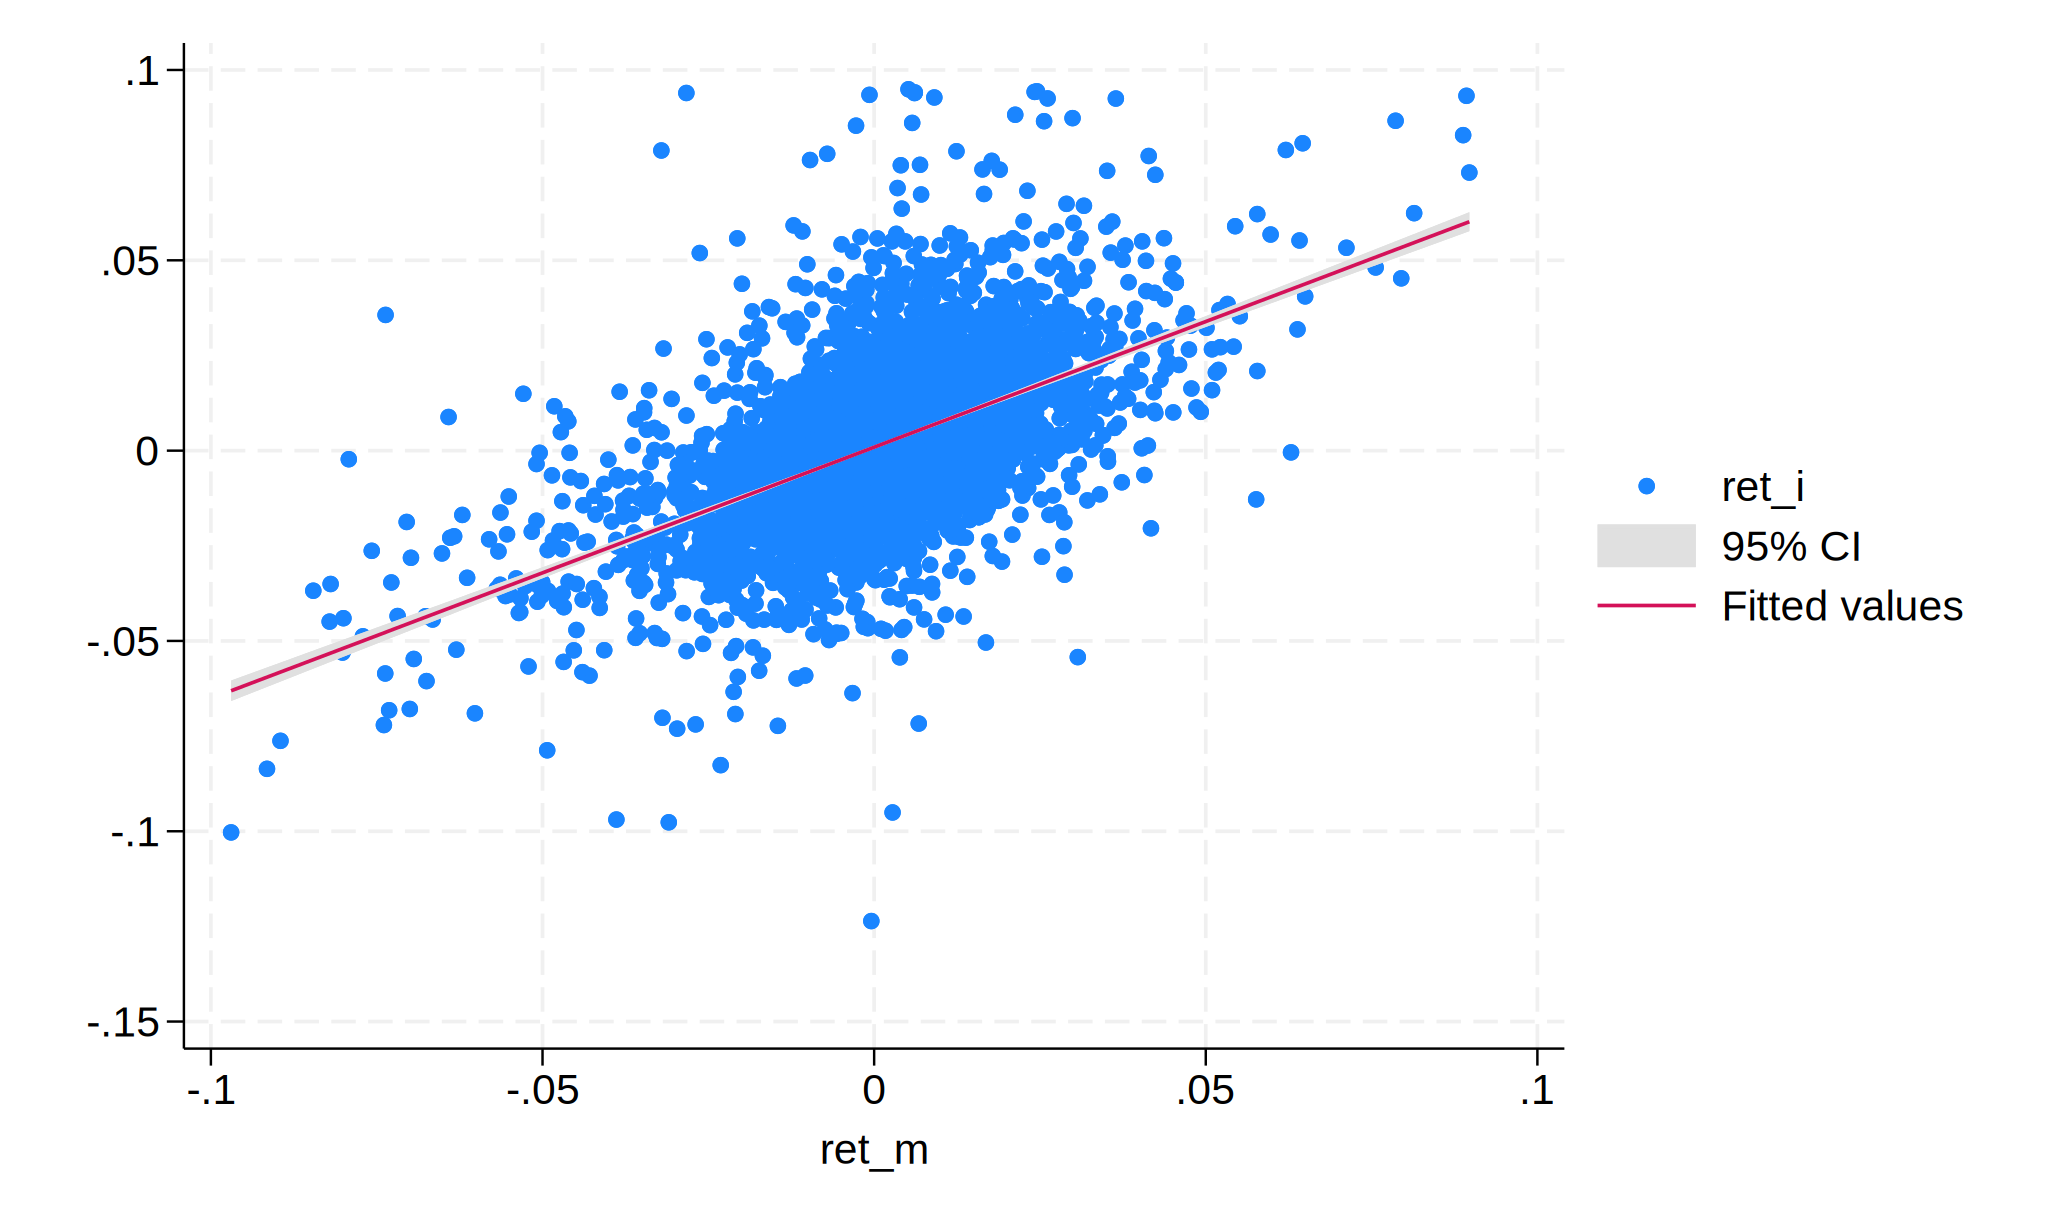

In [25]:
%%stata
twoway (scatter ret_i ret_m) (lfitci ret_i ret_m)

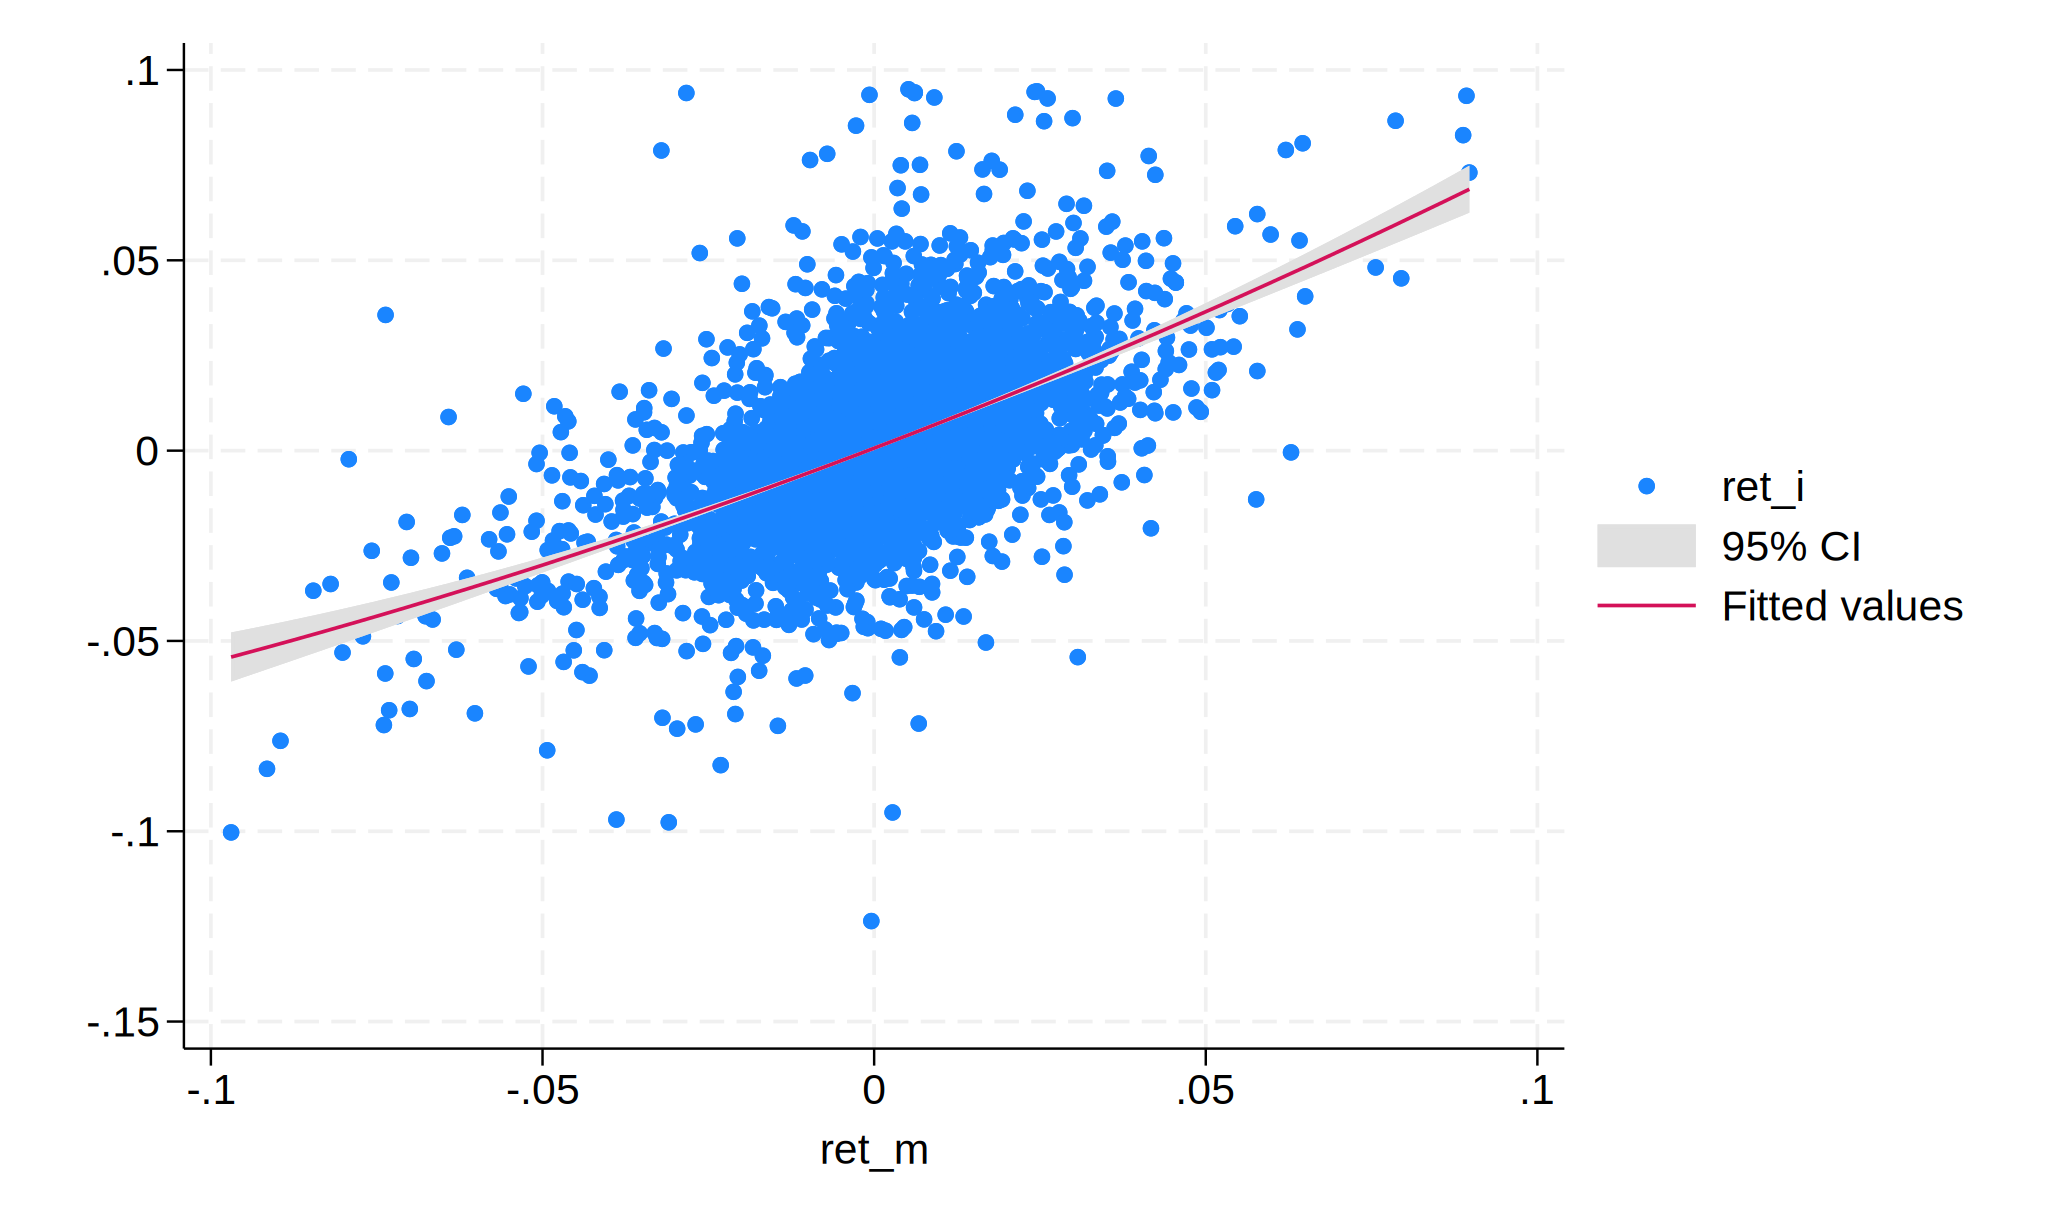

In [26]:
%%stata
twoway (scatter ret_i ret_m) (qfitci ret_i ret_m)


. cap which binscatter

. if _rc ssc install binscatter

. binscatter ret_i ret_m, reportreg
-------------------------------------------------------------------------------

      Source |       SS           df       MS      Number of obs   =     5,470
-------------+----------------------------------   F(1, 5468)      =   2238.45
       Model |  .601511043         1  .601511043   Prob > F        =    0.0000
    Residual |  1.46934516     5,468  .000268717   R-squared       =    0.2905
-------------+----------------------------------   Adj R-squared   =    0.2903
       Total |   2.0708562     5,469  .000378654   Root MSE        =    .01639

------------------------------------------------------------------------------
       ret_i | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       ret_m |   .6600729   .0139514    47.31   0.000     .6327226    .6874232
       _cons |   .0009072   .00022

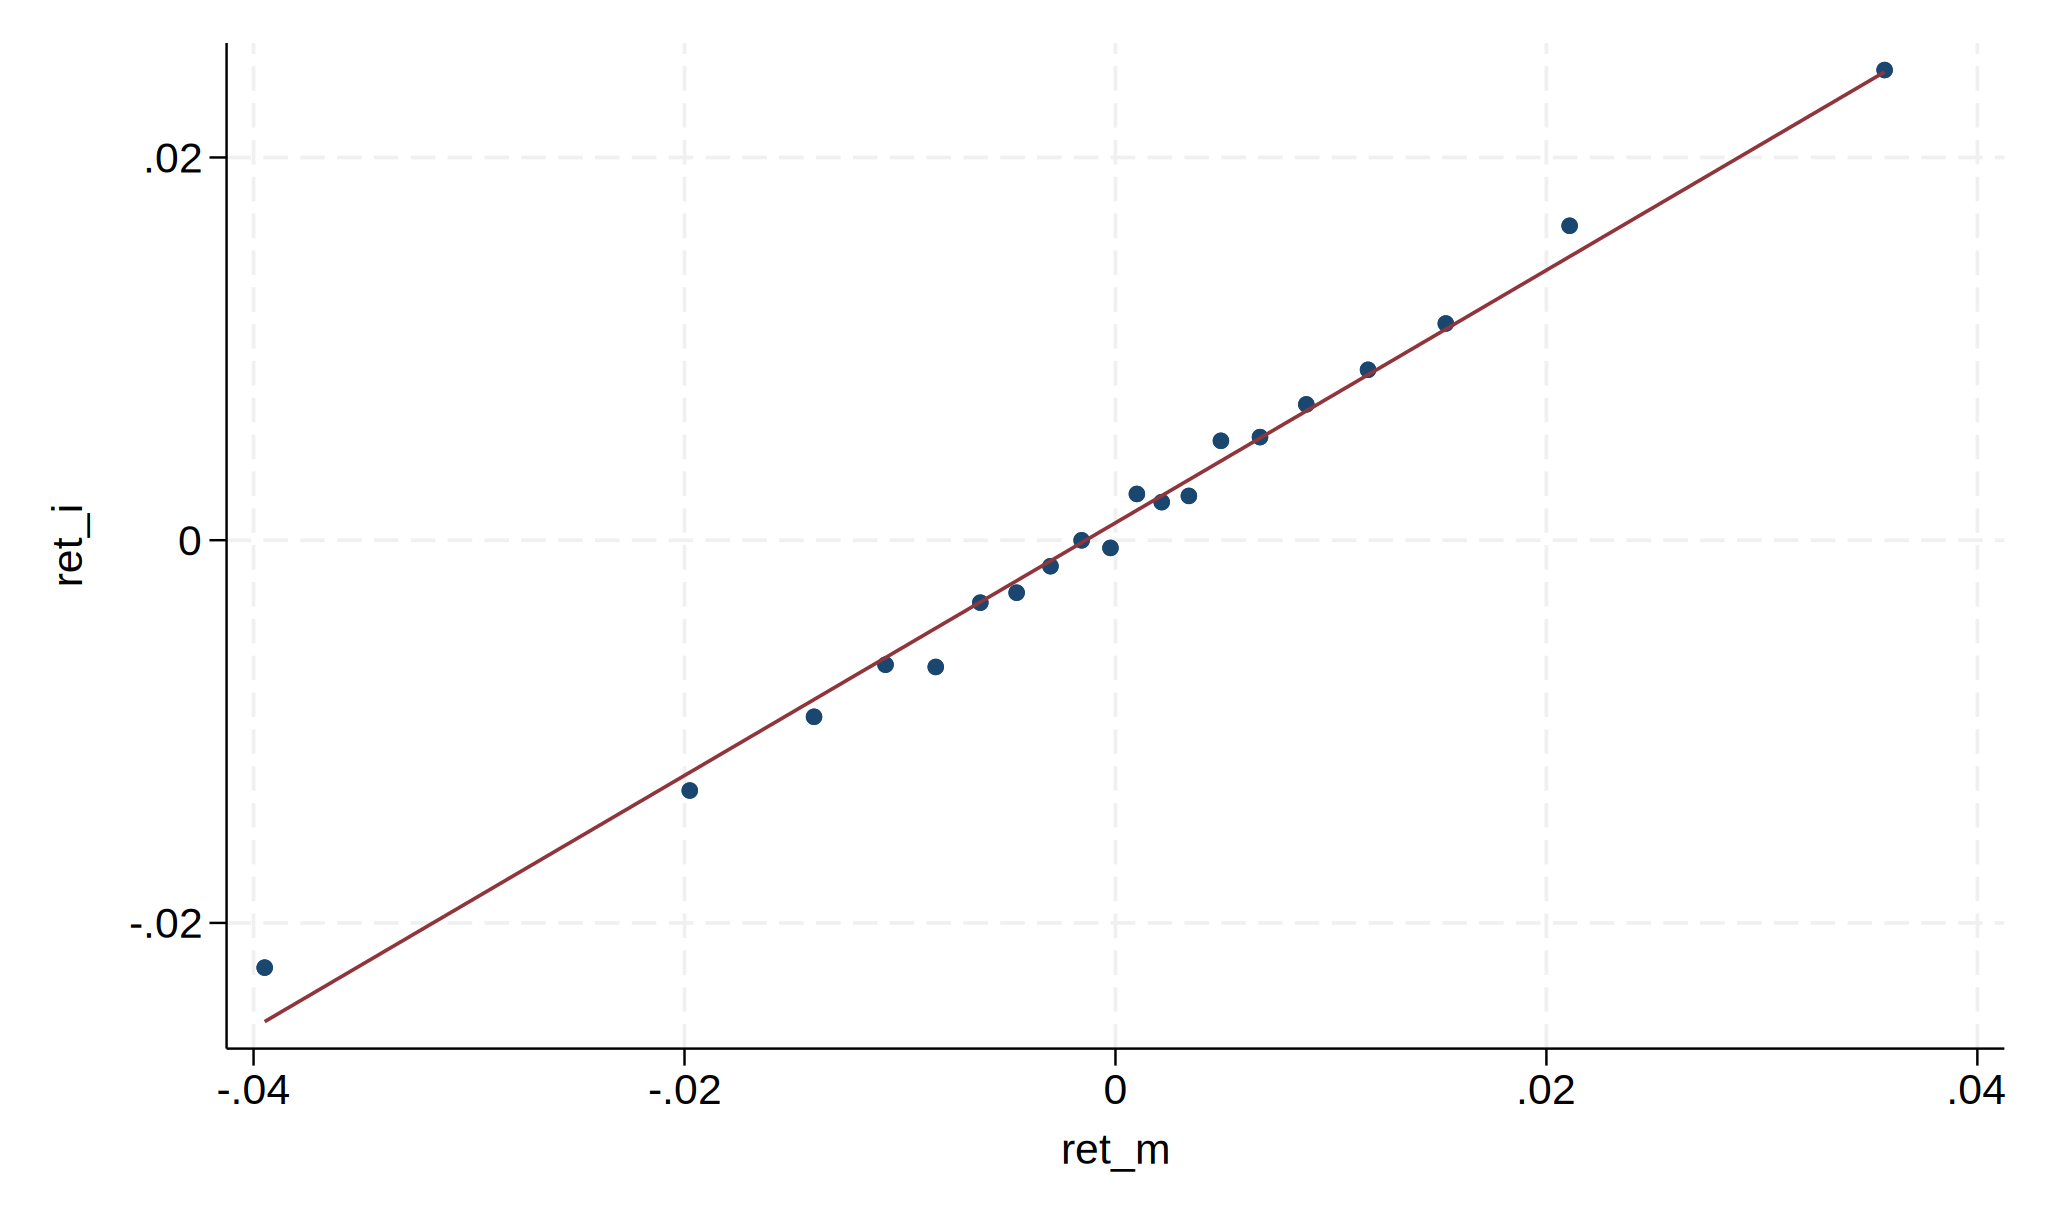

In [27]:
%%stata
cap which binscatter
if _rc ssc install binscatter
binscatter ret_i ret_m, reportreg

In [28]:
%%stata
help binscatter


Title
-----

    binscatter -- Binned scatterplots


Syntax
------

        binscatter varlist [if] [in] [weight] [, options]


    where varlist is
                y_1 [y_2 [...]] x

    options                     Description
    -------------------------------------------------------------------------
    Main
      by(varname)               plot separate series for each group (see
                                  important notes below)
      medians                   plot within-bin medians instead of means

    Bins
      nquantiles(#)             number of equal-sized bins to be created;
                                  default is 20
      genxq(varname)            generate quantile variable containing the
                                  bins
      discrete                  each x-value to be used as a separate bin
      xq(varname)               variable which already contains bins; bins
                                  therefore not recomputed

    Controls
      controls